# Imports & Configs

In [1]:
import warnings
import os
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
import tensorflow as tf
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Exploratory Data Analysis

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
for column_name in df_train.columns:
    unique_values = len(df_train[column_name].unique())
    print(f"Feature '{column_name}' has '{unique_values}' unique values")

Feature 'battery_power' has '1094' unique values
Feature 'blue' has '2' unique values
Feature 'clock_speed' has '26' unique values
Feature 'dual_sim' has '2' unique values
Feature 'fc' has '20' unique values
Feature 'four_g' has '2' unique values
Feature 'int_memory' has '63' unique values
Feature 'm_dep' has '10' unique values
Feature 'mobile_wt' has '121' unique values
Feature 'n_cores' has '8' unique values
Feature 'pc' has '21' unique values
Feature 'px_height' has '1137' unique values
Feature 'px_width' has '1109' unique values
Feature 'ram' has '1562' unique values
Feature 'sc_h' has '15' unique values
Feature 'sc_w' has '19' unique values
Feature 'talk_time' has '19' unique values
Feature 'three_g' has '2' unique values
Feature 'touch_screen' has '2' unique values
Feature 'wifi' has '2' unique values
Feature 'price_range' has '4' unique values


There are 4 price cateogries for this data

In [13]:
cat_features = []
num_features = []

for column_name in df_train.columns:
    unique_values = len(df_train[column_name].unique())
    if unique_values < 28:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

print("Numerical features: ", num_features)
print("Categorical features: ", cat_features)

Numerical features:  ['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']
Categorical features:  ['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'm_dep', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


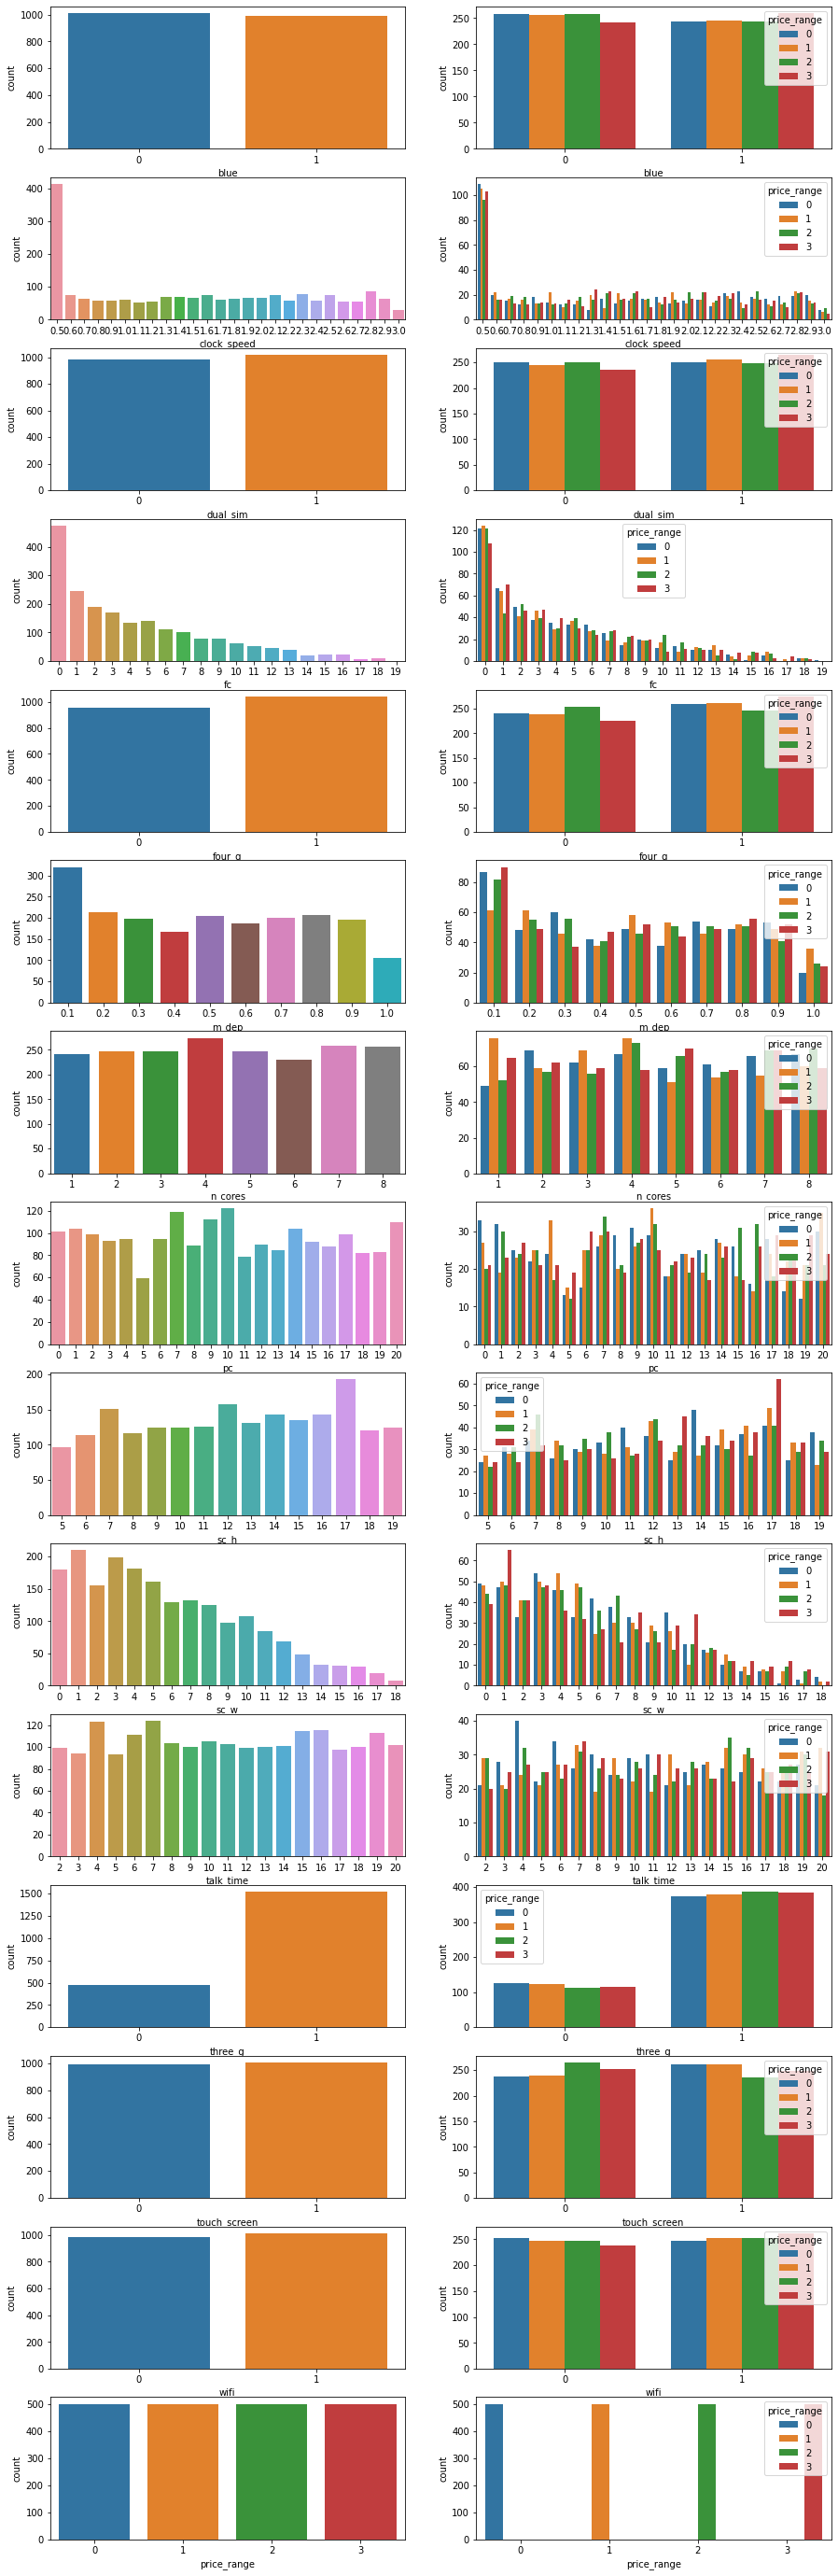

In [25]:
plt.figure(figsize = (15,60))
for idx, feature in enumerate(cat_features):
    plt.subplot(18, 2, idx*2+1)
    sns.countplot(x = feature , data = df_train)
    plt.subplot(18, 2, idx*2+2)
    sns.countplot(x = feature , data = df_train,hue='price_range')

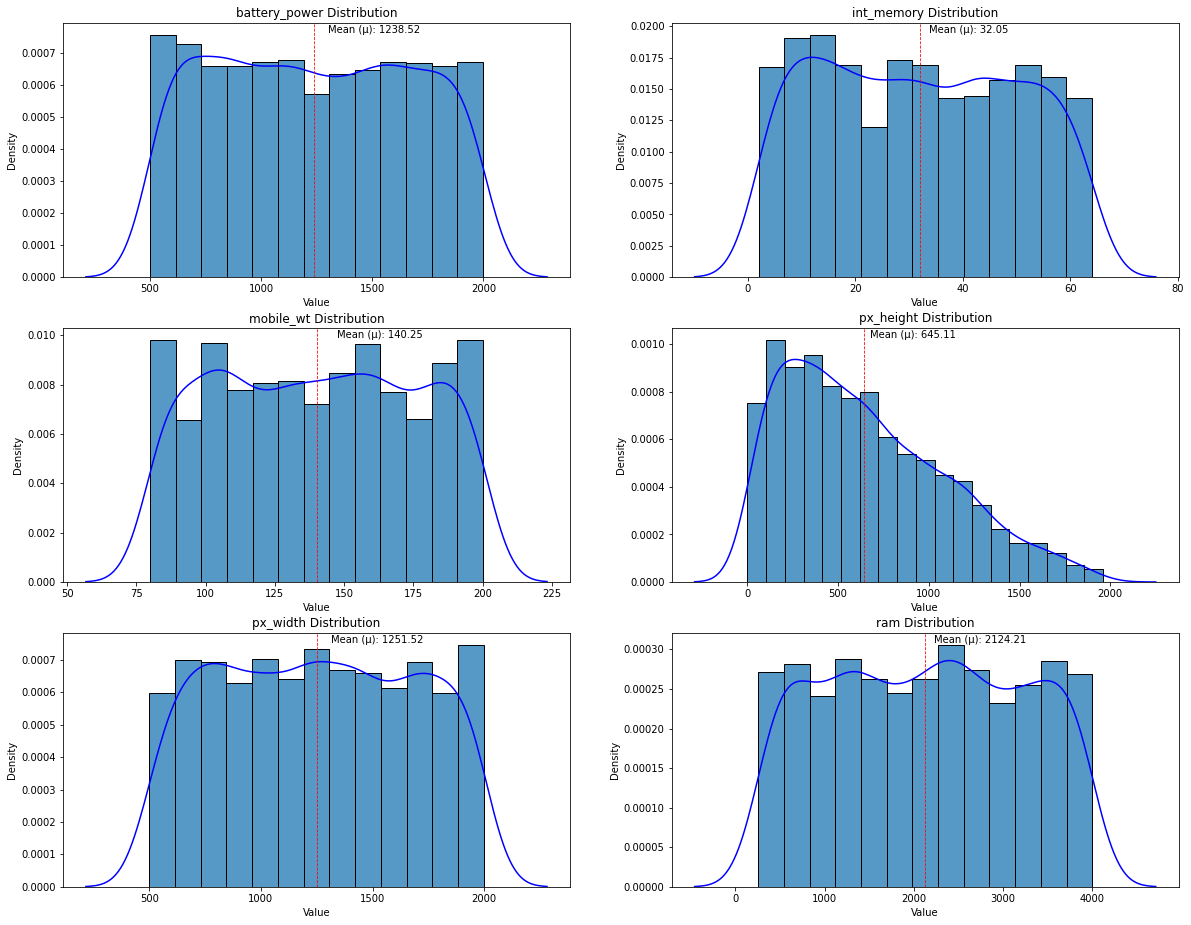

In [36]:
plt.figure(figsize=(20, 100))
for idx, column_name in enumerate(num_features):
  plt.subplot(18, 2, idx+1)
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df_train[column_name], stat='density')
  sns.kdeplot(df_train[column_name], color='blue')
  plt.axvline(df_train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df_train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df_train[column_name].mean()))
  plt.xlabel("Value")
  plt.ylabel("Density")
plt.show()

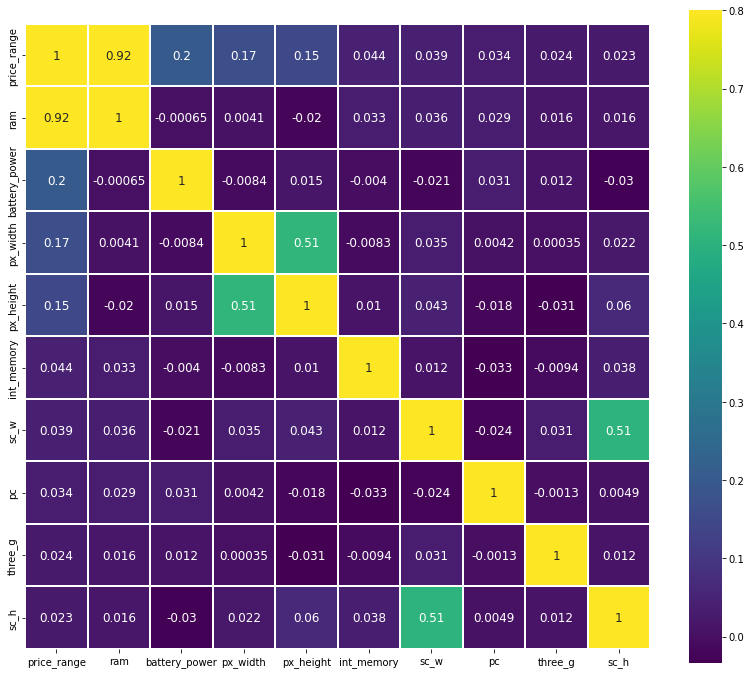

In [44]:
# top 10 largest correlation between features 
cols = df_train.corr().nlargest(10, 'price_range')['price_range'].index
cm = np.corrcoef(df_train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

# Data Preprocessing

## Missing Data

In [45]:
total = df_train.shape[0]
missing_columns = [col for col in df_train.columns if df_train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df_train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

No missing values!

## Duplicates 

In [46]:
print(f"Number of duplicate rows: {df_train.duplicated().sum()}")

Number of duplicate rows: 0


Great! No duplicates

## Scaling and Encoding

In [47]:
# convert to numpy arrays and split features from labels
x = df_train.drop('price_range', axis=1).values
x_predict = df_test.drop('id', axis=1).values
y = df_train['price_range'].values

In [48]:
# Scale the data using StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_predict = sc.fit_transform(x_predict)

In [49]:
# OneHot Encoding for labels  
ohe = OneHotEncoder()
y= ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [50]:
# Split the data into train and test datasets with ratio 9:1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# Modeling

For this problem, I create a neural network with 3 hidden layers. I used RELU as the activation function

Since this is a MultiClass classification problem, I used SoftMax as the activation function of the output layer

At first the model suffered from Overfitting, So I experimented with regularizes:
```
- L1:       loss: 0.1959 - accuracy: 0.9800
- L2:       loss: 0.2053 - accuracy: 0.9450
- L1L2:     loss: 0.2231 - accuracy: 0.9850
```
This clearly shows that the model accuracy and stability improved a lot after adding the L1 regularizer

In [105]:
L1L2_model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(4, activation='softmax')
])

L1L2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = L1L2_model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback])

L1L2_model.evaluate(x_test, y_test)

Epoch 1/400
102/102 [==============================] - 1s 3ms/step - loss: 9.3994 - accuracy: 0.3975 - val_loss: 5.2063 - val_accuracy: 0.5611
Epoch 2/400
102/102 [==============================] - 0s 2ms/step - loss: 2.9958 - accuracy: 0.5698 - val_loss: 1.5946 - val_accuracy: 0.6722
Epoch 3/400
102/102 [==============================] - 0s 2ms/step - loss: 1.2599 - accuracy: 0.6932 - val_loss: 0.9833 - val_accuracy: 0.7889
Epoch 4/400
102/102 [==============================] - 0s 2ms/step - loss: 0.9118 - accuracy: 0.8475 - val_loss: 0.8123 - val_accuracy: 0.9167
Epoch 5/400
102/102 [==============================] - 0s 2ms/step - loss: 0.7584 - accuracy: 0.9241 - val_loss: 0.7069 - val_accuracy: 0.9278
Epoch 6/400
102/102 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.9475 - val_loss: 0.6430 - val_accuracy: 0.9389
Epoch 7/400
102/102 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.9605 - val_loss: 0.6095 - val_accuracy: 0.9611

[0.20511747896671295, 0.9800000190734863]

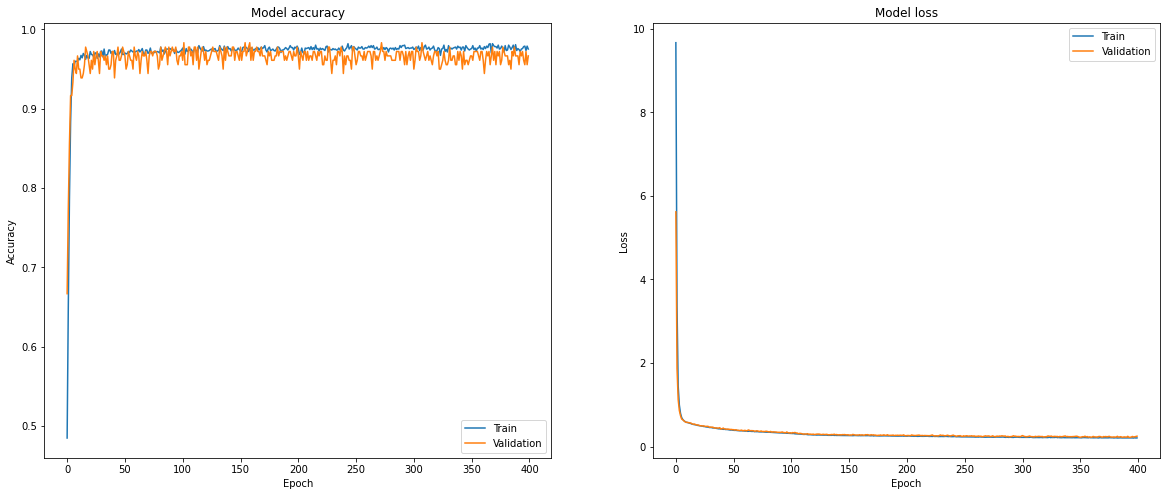

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'])

# Loss
axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model loss') 
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch') 
axs[1].legend(['Train', 'Validation']) 

plt.show()

At this point I think I reached great results but I wanted to experiment with other techniques of overcoming overfitting

I added batch Normalization to the neural network:
- **Without regularizer**: it didn't solve the overfitting problem
- **With regularizer**: it yielded better results than the one without regularization but it's not good enough compared to the model that doesn't have Batch Normalization

In [79]:
# Batch Normalization without regularizer
model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=0)

model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9600


[0.18209435045719147, 0.9599999785423279]

Finally, I wanted to try Dropouts 

So I tested it with and without regularization:
- **Without Regularizer**: loss: 0.2072 - accuracy: 0.9150
- **With Regularizer**: loss: 0.4594 - accuracy: 0.9800

In [90]:
model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

I added EarlyStopping to the callbacks and split the data into train and validation datasets with ratio 9:1 

In [91]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback])

Epoch 1/400
102/102 [==============================] - 1s 4ms/step - loss: 10.4670 - accuracy: 0.3062 - val_loss: 6.8182 - val_accuracy: 0.5722
Epoch 2/400
102/102 [==============================] - 0s 2ms/step - loss: 4.4986 - accuracy: 0.4877 - val_loss: 2.7585 - val_accuracy: 0.6278
Epoch 3/400
102/102 [==============================] - 0s 2ms/step - loss: 2.0838 - accuracy: 0.5352 - val_loss: 1.5307 - val_accuracy: 0.6111
Epoch 4/400
102/102 [==============================] - 0s 2ms/step - loss: 1.3712 - accuracy: 0.5481 - val_loss: 1.0677 - val_accuracy: 0.7111
Epoch 5/400
102/102 [==============================] - 0s 2ms/step - loss: 1.1581 - accuracy: 0.6222 - val_loss: 0.9678 - val_accuracy: 0.8389
Epoch 6/400
102/102 [==============================] - 0s 1ms/step - loss: 1.0890 - accuracy: 0.6549 - val_loss: 0.9156 - val_accuracy: 0.8389
Epoch 7/400
102/102 [==============================] - 0s 2ms/step - loss: 1.0372 - accuracy: 0.6901 - val_loss: 0.8842 - val_accuracy: 0.922

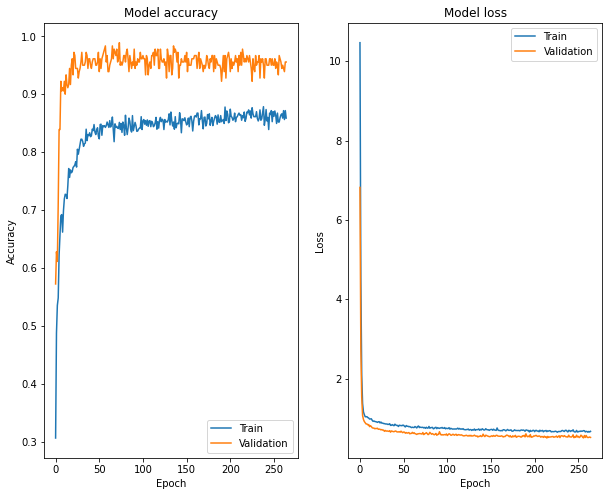

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'])

# Loss
axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model loss') 
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch') 
axs[1].legend(['Train', 'Validation']) 

plt.show()

We can notice some interesting points in the graph:
- The traning accuracy was lower than the validation accuracy, This is normal because of the dropout layers
- The dropout layers caused some instability in the training and validation metrics 

In [93]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.9750


[0.49677810072898865, 0.9750000238418579]

# Evalutaion

Inverse OneHot encoding and convert predictions to labels  

In [16]:
y_predict = L1L2_model.predict(x_test)

predictions = list()
for i in range(len(y_predict)):
    predictions.append(np.argmax(y_predict[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [17]:
print(classification_report(test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.86      0.91      0.88        46
           2       0.96      0.92      0.94        53
           3       0.96      1.00      0.98        46

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



# Predictions

In [18]:
y_predict = L1L2_model.predict(x_predict)

In [19]:
predictions = []

for i in range(len(y_predict)):
    predictions.append(np.argmax(y_predict[i]))

predictions[0:10]

[3, 3, 2, 3, 1, 3, 3, 1, 3, 0]